In [2]:
import numpy as np
import pandas as pd
from pathlib import Path

In [ ]:
subs[['customer_ID', 'lnew']].rename(columns={"lnew": "prediction"}).to_csv("submission.csv", index=False)

In [5]:
subs = pd.read_csv("submission.csv")
subs.rename(columns={"prediction":"lnew"}, inplace=True)
subs = pd.merge(subs, pd.read_csv("submission.csv.771-2"), on="customer_ID", how="inner")
subs.rename(columns={"prediction ":"l771-2"}, inplace=True)
subs = pd.merge(subs, pd.read_csv("submission.csv.771"), on="customer_ID", how="inner")
subs.rename(columns={"prediction":"l771"}, inplace=True)
subs = pd.merge(subs, pd.read_csv("submission.csv.770-2"), on="customer_ID", how="inner")
subs.rename(columns={"prediction":"l770-2"}, inplace=True)
subs = pd.merge(subs, pd.read_csv("submission.csv.770"), on="customer_ID", how="inner")
subs.rename(columns={"prediction":"l770"}, inplace=True)
subs = pd.merge(subs, pd.read_csv("submission.csv.765"), on="customer_ID", how="inner")
subs.rename(columns={"prediction":"l765"}, inplace=True)
subs = pd.merge(subs, pd.read_csv("submission.csv.764"), on="customer_ID", how="inner")
subs.rename(columns={"prediction":"l764"}, inplace=True)
subs = pd.merge(subs, pd.read_csv("submission.csv.763-1"), on="customer_ID", how="inner")
subs.rename(columns={"prediction":"l763-1"}, inplace=True)
subs = pd.merge(subs, pd.read_csv("submission.csv.763-2"), on="customer_ID", how="inner")
subs.rename(columns={"prediction":"l763-2"}, inplace=True)
subs = pd.merge(subs, pd.read_csv("submission.csv.763-3"), on="customer_ID", how="inner")
subs.rename(columns={"prediction":"l763-3"}, inplace=True)
subs = pd.merge(subs, pd.read_csv("submission.csv.753"), on="customer_ID", how="inner")
subs.rename(columns={"prediction":"l753"}, inplace=True)
subs

,customer_ID,lnew,l771-2,l771,l770-2,l770,l765,l764,l763-1,l763-2,l763-3,l753
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0.060515,0.180407,0.060515,0.060515,0.073283,0.180407,0.180407,0.180407,0.180407,0.180407,0.135306
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0.005730,0.044230,0.044230,0.029465,0.029465,0.004871,0.029465,0.038739,0.038361,0.043173,0.029465
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0.056222,0.097463,0.097463,0.060005,0.060005,0.042870,0.060005,0.077655,0.092037,0.060005,0.060005
3,00003b41e58ede33b8daf61ab56d9952f17c9ad1c3976c...,0.577419,0.443629,0.443629,0.318961,0.318961,0.309818,0.318961,0.372262,0.397523,0.318961,0.318961
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0.845125,0.860235,0.762211,0.769071,0.769071,0.750628,0.860235,0.722983,0.774095,0.749060,0.860235
...,...,...,...,...,...,...,...,...,...,...,...,...
924616,ffff952c631f2c911b8a2a8ca56ea6e656309a83d2f64c...,0.052442,0.078469,0.061700,0.042919,0.042919,0.029654,0.042919,0.078469,0.065474,0.048807,0.042919
924617,ffffcf5df59e5e0bba2a5ac4578a34e2b5aa64a1546cd3...,0.766859,0.748113,0.681420,0.709523,0.709523,0.748113,0.677248,0.711450,0.691380,0.709523,0.677248
924618,ffffd61f098cc056dbd7d2a21380c4804bbfe60856f475...,0.485185,0.695873,0.502164,0.536819,0.536819,0.695873,0.536819,0.564882,0.507771,0.536819,0.536819
924619,ffffddef1fc3643ea179c93245b68dca0f36941cd83977...,0.542073,0.394737,0.394737,0.319916,0.319916,0.318284,0.319916,0.273269,0.280532,0.319916,0.319916


In [25]:
#subs['l771'] = subs['lnew']
#subs['lnew'] = subs.apply(lambda x: max(x[['l771', 'l770-2', 'l770', 'l765', 'l764', 'l763-1', 'l763-2', 'l763-3', 'l753']]), axis=1)

cv1 = subs.sort_values('lnew', ascending=False).head(39065)
cv2 = subs.sort_values('l771', ascending=False).head(39065)
cv1mask = cv1.customer_ID.isin(cv2.customer_ID)
cv2mask = cv2.customer_ID.isin(cv1.customer_ID)
cvdf = cv1[~cv1mask]
cvdf = pd.concat([cvdf, cv2[~cv2mask]], ignore_index=True)
cvdf

,customer_ID,lnew,l771,l770-2,l770,l765,l764,l763-1,l763-2,l763-3,l753
0,1d3497accdc058de63b54ed6359cc3ae8ab741e0881b3f...,1.033199,0.857376,0.971288,0.971288,1.033199,0.964830,0.959809,0.977804,0.960519,0.964830
1,bc83bfd676cd009e01482be1e58b74eb8f2ee341bc7dce...,1.025355,0.858059,0.937454,0.937454,1.025355,0.941775,0.909024,0.923439,0.934788,0.941775
2,d04515c40b1fd66bc053789285b9775669f6fef5bf412e...,1.024467,0.843141,0.900313,0.900313,1.024467,0.878554,0.877663,0.868871,0.942397,0.878554
3,7c984cee7ee9f84668777ba18ca5b9aeb4c2297610d1cd...,1.022826,0.858303,0.905352,0.905352,1.022826,0.915656,0.891722,0.892351,0.898979,0.915656
4,492208a8555d4a7b650e2f239fee4cb47dee7f3b70675b...,1.020397,0.854148,0.915484,0.915484,1.020397,0.899128,0.905289,0.893886,0.933762,0.899128
...,...,...,...,...,...,...,...,...,...,...,...
12413,90529c8ecbaaaf282a541751f126835e4f906c668a1058...,0.934436,0.858785,0.893935,0.893935,0.934436,0.877796,0.824877,0.859521,0.890218,0.877796
12414,1e805d96e12a11045c6397170b0fdfad695009e6699297...,0.924879,0.858778,0.839099,0.839099,0.924879,0.858035,0.875229,0.789506,0.849732,0.858035
12415,f96ddaa0742e61976350ec6b340c29152e58d6eb750677...,0.903677,0.858753,0.852251,0.852251,0.903677,0.838903,0.821442,0.777634,0.824182,0.838903
12416,39b255e8c5375489683eb2ed5c21a6c6863062de7253e1...,0.892164,0.858749,0.844387,0.844387,0.892164,0.876400,0.844322,0.807089,0.876942,0.876400


In [6]:
col='lnew'
cols = ['l771-2', 'l771', 'l770-2', 'l770', 'l765', 'l764', 'l763-1', 'l763-2', 'l763-3', 'l753']
#col='l765'
#cols = ['l753']
ones = subs[(subs[col] > 0.5)]
for key in cols:
    ones = ones[ones[key] > 0.5]
ones

,customer_ID,lnew,l771-2,l771,l770-2,l770,l765,l764,l763-1,l763-2,l763-3,l753
4,00004b22eaeeeb0ec976890c1d9bfc14fd9427e98c4ee9...,0.845125,0.860235,0.762211,0.769071,0.769071,0.750628,0.860235,0.722983,0.774095,0.749060,0.860235
6,00007cfcce97abfa0b4fa0647986157281d01d3ab90de9...,0.939278,0.892400,0.838282,0.857596,0.857596,0.892400,0.867420,0.852255,0.886746,0.874536,0.867420
8,00008f50a1dd76fa211ba36a2b0d5a1b201e4134a5fd53...,0.533346,0.722063,0.610374,0.694959,0.694959,0.722063,0.694959,0.662428,0.647995,0.694959,0.694959
22,0001f3f954aa6f02144ee5f3a84bf9fb3f67089dacc132...,0.929666,0.889997,0.795183,0.817135,0.817135,0.889997,0.725903,0.812291,0.737141,0.719411,0.725903
23,00020f228f70fb1e4bda115846f78470473727b4b723a7...,0.706912,0.594742,0.547274,0.501923,0.501923,0.503437,0.501923,0.530819,0.594742,0.501923,0.501923
...,...,...,...,...,...,...,...,...,...,...,...,...
924590,fffd6d7df9dc3ab9b45dee26ddd5105a7d772b56709f75...,0.958152,0.924611,0.840887,0.893542,0.893542,0.924611,0.899749,0.808395,0.857979,0.807262,0.899749
924593,fffd9644010686e7e2bf96ca6f3af174bd2b075a887445...,0.771236,0.648350,0.641679,0.648350,0.648350,0.603886,0.648350,0.618506,0.608703,0.607707,0.648350
924599,fffdfc616936506845bdc453898f71ef3b6a24adcf6ccc...,0.778337,0.743651,0.599882,0.654559,0.654559,0.743651,0.654559,0.655251,0.617752,0.560912,0.654559
924610,ffff1cf18b40bacfe82d222c6d214eb8400c5a82b207ff...,0.734539,0.734539,0.734539,0.734539,0.620996,0.729000,0.729000,0.729000,0.729000,0.729000,0.546750


In [13]:
ones1 = ones[(ones[col] > 0.9)]
for key in cols:
    ones1 = ones1[ones1[key] > 0.9]
ones1

,customer_ID,lnew,l771,l770-2,l770,l765,l764,l763-1,l763-2,l763-3,l753
82,0005ffc8a2acf9c3e50fb51199e1496f0e85d5c5d4b666...,0.982598,0.929620,0.934402,0.934402,0.982598,0.953045,0.913261,0.952596,0.913638,0.953045
107,0007aa1c999e408611b8acff4a3b32fcef69346defc528...,1.027335,0.908558,0.937373,0.937373,1.027335,0.943471,0.961635,0.946631,0.941933,0.943471
189,000db9f2d53c7347f63bccf721ab7433983f5572dc3588...,0.989089,0.919487,0.935890,0.935890,0.989089,0.929522,0.914017,0.910066,0.919035,0.929522
227,0010aed1bb056f5303b166aeebec77b0ad599e524f68a6...,0.967323,0.909918,0.926599,0.926599,0.967323,0.944034,0.927818,0.931669,0.917280,0.944034
373,001ac87681f696414a8316a65f3213d6624deef5f75fbb...,1.033007,0.929514,0.948966,0.948966,1.033007,0.949859,0.924850,0.928751,0.944929,0.949859
...,...,...,...,...,...,...,...,...,...,...,...
923978,ffd195e4c7b8706bdf09bae048602521572c2553e00f83...,1.025081,0.929496,0.946659,0.946659,1.025081,0.949207,0.916266,0.923126,0.941216,0.949207
924334,ffebdaeabd20328f366cf6673a4988497410c12dc444aa...,1.014614,0.918511,0.935992,0.935992,1.014614,0.958695,0.910204,0.934762,0.952476,0.958695
924406,fff0edae222c9afb6a0914406b06f5c77156b320e69aba...,1.013951,0.926035,0.973450,0.973450,1.013951,0.921082,0.909476,0.922049,0.944606,0.921082
924499,fff6f66cc5c90f0129ef89f5e0693e1b8cae0af1ce7723...,1.020754,0.920953,0.956181,0.956181,1.020754,0.948351,0.918219,0.934471,0.933661,0.948351


In [19]:
up=0.7
low=0.6
ones2 = ones[(ones[col] > low) & (ones[col] < up)]
for key in cols:
    ones2 = ones2[(ones2[key] > low) & (ones2[key] < up)]
ones2

,customer_ID,lnew,l771,l770-2,l770,l765,l764,l763-1,l763-2,l763-3,l753
87,00065712208b453d3385e9aed3e3257d2c102bbc7b4c04...,0.657586,0.623668,0.625984,0.625984,0.657586,0.625984,0.632569,0.626584,0.625984,0.625984
473,0022837e64cfa769954951e31063c695df6e2865873298...,0.697204,0.678895,0.697204,0.697204,0.634134,0.697204,0.629607,0.613162,0.697204,0.697204
528,0025bc5a04f3f570730eb219275c2f327ac3c5db88b515...,0.690002,0.620039,0.621291,0.621291,0.671173,0.621291,0.690002,0.689899,0.621291,0.621291
652,002f71ea2528a0803c737f3c0d44cdc984c0785c29d50e...,0.699056,0.655335,0.699056,0.699056,0.651632,0.699056,0.605389,0.650042,0.699056,0.699056
1184,0052fceacb84cbbb4cfca7998b4ebeb831114bab6334ed...,0.674321,0.604559,0.661102,0.661102,0.674321,0.661102,0.628967,0.601965,0.661102,0.661102
...,...,...,...,...,...,...,...,...,...,...,...
923462,ffadf3f5b91d9ab7224ce05d7b87a4cb245b37efaf6fac...,0.683788,0.615479,0.639020,0.639020,0.666917,0.639020,0.614770,0.683788,0.639020,0.639020
924357,ffed8350963b2097fd9fffd329c2baa67626996d4376ed...,0.681417,0.673122,0.652860,0.652860,0.681417,0.652860,0.636114,0.608963,0.652860,0.652860
924544,fffa0c875373a8bc2ef36b0749b933e2850e2cc9d32a5e...,0.682215,0.630069,0.656804,0.656804,0.682215,0.656804,0.654562,0.612923,0.656804,0.656804
924589,fffd6cd753536f48b322fb01ecc14e032e9e257c56c42f...,0.685027,0.652215,0.638682,0.638682,0.685027,0.638682,0.648666,0.638637,0.638682,0.638682


In [7]:
nones = subs[(subs[col] < 0.5)]
for key in cols:
    nones = nones[nones[key] < 0.5]
nones

,customer_ID,lnew,l771-2,l771,l770-2,l770,l765,l764,l763-1,l763-2,l763-3,l753
0,00000469ba478561f23a92a868bd366de6f6527a684c9a...,0.060515,0.180407,0.060515,0.060515,0.073283,0.180407,0.180407,0.180407,0.180407,0.180407,0.135306
1,00001bf2e77ff879fab36aa4fac689b9ba411dae63ae39...,0.005730,0.044230,0.044230,0.029465,0.029465,0.004871,0.029465,0.038739,0.038361,0.043173,0.029465
2,0000210045da4f81e5f122c6bde5c2a617d03eef67f82c...,0.056222,0.097463,0.097463,0.060005,0.060005,0.042870,0.060005,0.077655,0.092037,0.060005,0.060005
5,00004ffe6e01e1b688170bbd108da8351bc4c316eacfef...,0.001467,0.043381,0.041807,0.027020,0.027020,0.003403,0.027020,0.032819,0.032819,0.043381,0.027020
7,000089cc2a30dad8e6ba39126f9d86df6088c9f975093a...,0.154672,0.394198,0.394198,0.271693,0.271693,0.300096,0.271693,0.333840,0.288161,0.271693,0.271693
...,...,...,...,...,...,...,...,...,...,...,...,...
924613,ffff7210a542ace67b1ab66aa20cb478495bdb9a4ed7c7...,0.273688,0.356704,0.354005,0.339433,0.339433,0.322566,0.339433,0.356704,0.355901,0.339433,0.339433
924614,ffff76707978792b6eb985027dbe0e85435e90429459c5...,0.052576,0.060487,0.044319,0.036411,0.036411,0.021217,0.036411,0.060487,0.041552,0.036411,0.036411
924615,ffff824b313399b00db6bc930b83f1a2188d8b1dbd3a31...,0.007124,0.047523,0.041970,0.028224,0.028224,0.004378,0.028224,0.047523,0.034934,0.044638,0.028224
924616,ffff952c631f2c911b8a2a8ca56ea6e656309a83d2f64c...,0.052442,0.078469,0.061700,0.042919,0.042919,0.029654,0.042919,0.078469,0.065474,0.048807,0.042919


In [6]:
924621 - (nones['customer_ID'].count() + ones['customer_ID'].count())

56949

In [7]:
onesmask = subs.customer_ID.isin(ones.customer_ID)
nonesmask = subs.customer_ID.isin(nones.customer_ID)
targetdf = subs[~onesmask][~nonesmask]
targetdf

/tmp/ipykernel_9039/142391079.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  targetdf = subs[~onesmask][~nonesmask]


,customer_ID,lnew,l771,l770-2,l770,l765,l764,l763-1,l763-2,l763-3,l753
17,00017cddc321be913b790e010267ae3f219839f518c5ed...,0.572297,0.472076,0.556358,0.556358,0.544316,0.556358,0.572297,0.561517,0.556358,0.556358
36,0002ee29f6d40961db64f5eab8e9d5863c480fd0489bf9...,0.530046,0.529066,0.523246,0.523246,0.530046,0.523246,0.511858,0.497416,0.523246,0.523246
43,0003247c3e28e47453cd287e9c75d8522e71bd1cd6dc2f...,0.639424,0.441240,0.408251,0.408251,0.639424,0.408251,0.542276,0.422218,0.408251,0.408251
59,00041d031f2b2c9facd1dda2adb2ddd5bd1f95143a2208...,0.575127,0.523340,0.561932,0.561932,0.575127,0.561932,0.492033,0.522577,0.561932,0.561932
67,000487d832f422ea043f8e89e143f3c24418b5efe3dd84...,0.634954,0.535716,0.482532,0.482532,0.453183,0.482532,0.574961,0.634954,0.482532,0.482532
...,...,...,...,...,...,...,...,...,...,...,...
924538,fff9afda5ad92787467eaed18ffdf44c52c663633d0d62...,0.501819,0.472780,0.465003,0.465003,0.501819,0.465003,0.445790,0.460135,0.465003,0.465003
924539,fff9bb02cbd43adf24d7a5a13ce6c6ce9910c9991f9b4c...,0.591262,0.491262,0.330358,0.330358,0.480865,0.330358,0.395694,0.566216,0.330358,0.330358
924563,fffb221ff0665f5e81193e2a9a49ea4f88f4159ee50786...,0.603518,0.511449,0.576037,0.576037,0.603518,0.576037,0.560720,0.488923,0.576037,0.576037
924570,fffbcef497e2d1e855b972054967722342bad83534fb6b...,0.618261,0.547777,0.571557,0.571557,0.618261,0.571557,0.593900,0.468290,0.571557,0.571557


In [12]:
targetdf[(targetdf['l771'] < 0.5) & (targetdf['l770-2'] < 0.5)].sort_values('lnew', ascending=False)

,customer_ID,lnew,l771,l770-2,l770,l765,l764,l763-1,l763-2,l763-3,l753
481978,85a02506ef8986927853d9e885d3d100e605fce2974e73...,0.760502,0.482657,0.458473,0.458473,0.555295,0.458473,0.647075,0.760502,0.458473,0.458473
314573,573a3e893496aec30ed5d6e5d74121e206fe87f3a0e1fa...,0.745089,0.490701,0.490701,0.484785,0.745089,0.745089,0.745089,0.745089,0.745089,0.558817
32101,08efdd1c8f9434643b5e6dda7f42236b3a104f67a337e6...,0.741575,0.497912,0.470320,0.470320,0.591875,0.470320,0.606755,0.741575,0.470320,0.470320
323841,59d47a54b21bc0bdf7073dfc91532246a8405caf470cc4...,0.739151,0.471905,0.488330,0.488330,0.653338,0.488330,0.535878,0.739151,0.488330,0.488330
815536,e1d58657c20ce68b3900af4632986bb4c6a5ec9ce7aac7...,0.728070,0.480903,0.480903,0.511151,0.728070,0.728070,0.728070,0.728070,0.728070,0.546053
...,...,...,...,...,...,...,...,...,...,...,...
861804,ee9d652413ba4c1cbecc02e6966f7dfa5dbf96355c27b3...,0.500019,0.351069,0.351069,0.354260,0.500019,0.500019,0.500019,0.500019,0.500019,0.375014
225457,3e70c60b3eeee35ccd187c9938b780f927e6b39a834fad...,0.500017,0.474534,0.403944,0.403944,0.500017,0.403944,0.405570,0.392203,0.403944,0.403944
700310,c1f0d4c6695930adc1fdd4d1c01f05310b3f5c845361b3...,0.500011,0.426875,0.366670,0.366670,0.407254,0.366670,0.500011,0.421422,0.366670,0.366670
808119,dfc4a24de4289e2161a1c7766f1adcf8bdb053986b6ac9...,0.500004,0.450683,0.430055,0.430055,0.467383,0.430055,0.500004,0.460745,0.430055,0.430055


In [7]:
subsidx = subs[(subs['lnew'] < 0.5) & (subs['l763-2'] > 0.5)].index

subs['lnew'] = subs.apply(lambda x: x['lnew']+.1 if ((x['lnew'] < 0.5) and (x['l763-2'] > 0.5)) else x['lnew'], axis=1)

In [8]:
subs.loc[subsidx]

,customer_ID,lnew,l770-2,l770,l765,l764,l763-1,l763-2,l763-3,l753
17,00017cddc321be913b790e010267ae3f219839f518c5ed...,0.572076,0.556358,0.556358,0.544316,0.556358,0.572297,0.561517,0.556358,0.556358
173,000cdbba15cd86aa7ac44a4a435022836a9ceca64183e9...,0.534865,0.434865,0.445099,0.535461,0.535461,0.535461,0.535461,0.535461,0.401596
235,00113eda56d6d96a039282db5f2ab75974416c35fabb09...,0.571617,0.450635,0.450635,0.560562,0.450635,0.453608,0.532901,0.450635,0.450635
238,00115dfc202027c10aa08a8d2efacfbc33d732194a7fbe...,0.598135,0.583951,0.583951,0.542962,0.583951,0.516979,0.625308,0.583951,0.583951
250,0011ff1d42fe3c0f266fcf1463476e04759a231d9062f9...,0.580055,0.443621,0.443621,0.478391,0.443621,0.430782,0.514183,0.443621,0.443621
...,...,...,...,...,...,...,...,...,...,...
924382,ffef18ac6c52d11a29dc999ea716921d26230f7349be82...,0.564781,0.490477,0.490477,0.535979,0.490477,0.565709,0.505857,0.490477,0.490477
924399,fff05ba52866982992d3f649427b70e9e41c3ff9445cfc...,0.460706,0.577733,0.577733,0.461944,0.577733,0.414570,0.561949,0.577733,0.577733
924473,fff588af099cf1af5ee12ebe113f3e3e62dc3031e66df7...,0.581516,0.581923,0.581923,0.580456,0.581923,0.501694,0.526909,0.581923,0.581923
924539,fff9bb02cbd43adf24d7a5a13ce6c6ce9910c9991f9b4c...,0.591262,0.330358,0.330358,0.480865,0.330358,0.395694,0.566216,0.330358,0.330358


In [18]:
delta = targetdf[targetdf[col]>0]
for key in cols:
    delta = delta[((delta[col]>0.5) & (delta[key] < 0.5)) | ((delta[col]<0.5) & (delta[key] > 0.5))]
delta

,customer_ID,lnew,l770-2,l770,l765,l764,l763-1,l763-2,l763-3,l753
43,0003247c3e28e47453cd287e9c75d8522e71bd1cd6dc2f...,0.441240,0.408251,0.408251,0.639424,0.408251,0.542276,0.422218,0.408251,0.408251
69,0004b2405bc146414f7ff5e1f944092ba7bcababfdc600...,0.469645,0.525032,0.525032,0.497269,0.525032,0.449865,0.485112,0.525032,0.525032
92,00067a3da059f15b25479d4dc78876ce62ace540e0d0ae...,0.532750,0.488218,0.488218,0.540831,0.488218,0.536637,0.449334,0.488218,0.488218
93,00067b43b0deb37c895dceb1e4306064a5a6ee41c0d373...,0.671402,0.671402,0.763365,0.590118,0.590118,0.590118,0.590118,0.590118,0.442588
129,0009baf23aefc89b505a9aa1c4d053249e111c00ff2bef...,0.580098,0.487188,0.487188,0.505014,0.487188,0.573147,0.610449,0.487188,0.487188
...,...,...,...,...,...,...,...,...,...,...
924448,fff42ffeb1e99581ab829fc2e85271b4f00236f82d4099...,0.451561,0.440748,0.440748,0.601775,0.440748,0.637138,0.459318,0.440748,0.440748
924498,fff6ecc98f18236cbb089be29c11139f121922b138951e...,0.518102,0.443231,0.443231,0.518538,0.443231,0.490307,0.373609,0.443231,0.443231
924526,fff8d008867ce570162e668434a3d0ff46586d792635cc...,0.436002,0.493445,0.493445,0.506639,0.493445,0.507425,0.472247,0.493445,0.493445
924538,fff9afda5ad92787467eaed18ffdf44c52c663633d0d62...,0.472780,0.465003,0.465003,0.501819,0.465003,0.445790,0.460135,0.465003,0.465003


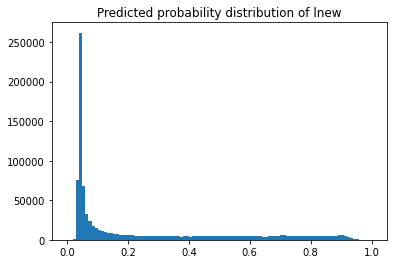

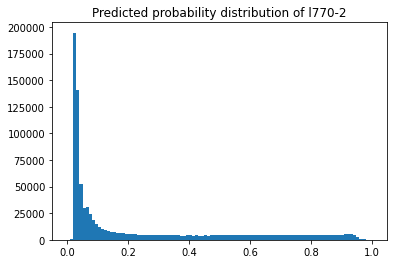

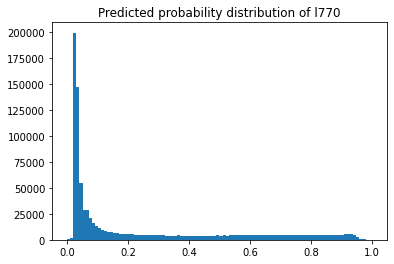

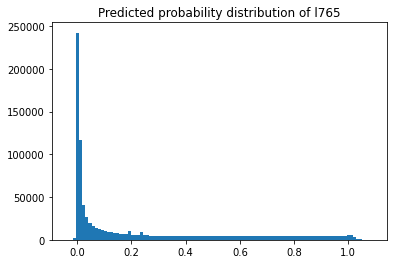

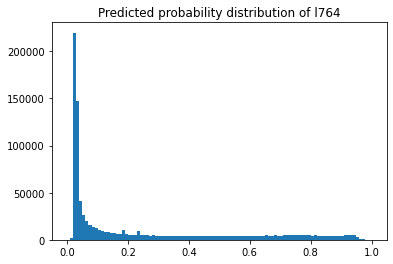

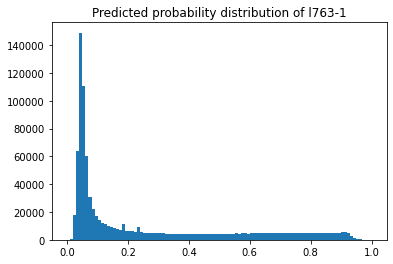

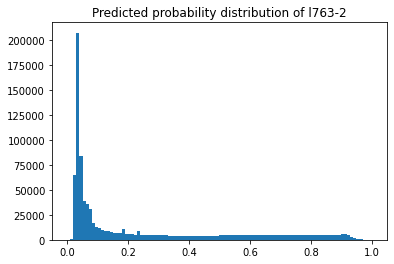

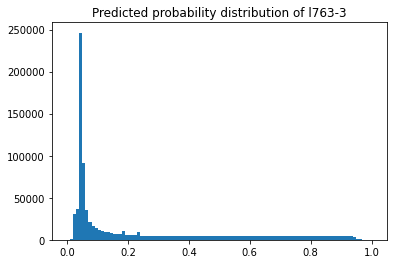

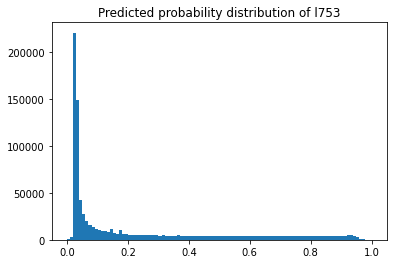

In [16]:
for key in ['lnew', 'l770-2', 'l770', 'l765', 'l764', 'l763-1', 'l763-2', 'l763-3', 'l753']:
    plt.hist(subs[key], bins = 100)
    plt.title(f"Predicted probability distribution of {key}")
    plt.show()

In [20]:
300*9*11

29700

In [3]:
def amex_metric(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:

    def top_four_percent_captured(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        four_pct_cutoff = int(0.04 * df['weight'].sum())
        df['weight_cumsum'] = df['weight'].cumsum()
        df_cutoff = df.loc[df['weight_cumsum'] <= four_pct_cutoff]
        return (df_cutoff['target'] == 1).sum() / (df['target'] == 1).sum()
        
    def weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        df = (pd.concat([y_true, y_pred], axis='columns')
              .sort_values('prediction', ascending=False))
        df['weight'] = df['target'].apply(lambda x: 20 if x==0 else 1)
        df['random'] = (df['weight'] / df['weight'].sum()).cumsum()
        total_pos = (df['target'] * df['weight']).sum()
        df['cum_pos_found'] = (df['target'] * df['weight']).cumsum()
        df['lorentz'] = df['cum_pos_found'] / total_pos
        df['gini'] = (df['lorentz'] - df['random']) * df['weight']
        return df['gini'].sum()

    def normalized_weighted_gini(y_true: pd.DataFrame, y_pred: pd.DataFrame) -> float:
        y_true_pred = y_true.rename(columns={'target': 'prediction'})
        return weighted_gini(y_true, y_pred) / weighted_gini(y_true, y_true_pred)

    g = normalized_weighted_gini(y_true, y_pred)
    d = top_four_percent_captured(y_true, y_pred)

    return 0.5 * (g + d)